<a href="https://colab.research.google.com/github/vijayasrithavva/EmployeeAttritionPrediction/blob/main/AttritionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder as le

# Data Extraction

In [ ]:
attrition_data = pd.read_csv('/content/Train.csv')

In [ ]:
attrition_data.head()

Employee_ID Gender   Age  Education_Level  ... VAR5 VAR6 VAR7 Attrition_rate
0   EID_23371      F  42.0                4  ...    4    5    3         0.1841
1   EID_18000      M  24.0                3  ...    3    5    3         0.0670
2    EID_3891      F  58.0                3  ...    3    8    3         0.0851
3   EID_17492      F  26.0                3  ...    3    7    3         0.0668
4   EID_22534      F  31.0                1  ...    2    8    2         0.1827

[5 rows x 24 columns]

In [ ]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [ ]:
attrition_data.describe()

Age  Education_Level  ...         VAR7  Attrition_rate
count  6588.000000      7000.000000  ...  7000.000000     7000.000000
mean     39.622799         3.187857  ...     3.257000        0.189376
std      13.606920         1.065102  ...     0.925319        0.185753
min      19.000000         1.000000  ...     1.000000        0.000000
25%      27.000000         3.000000  ...     3.000000        0.070400
50%      37.000000         3.000000  ...     3.000000        0.142650
75%      52.000000         4.000000  ...     4.000000        0.235000
max      65.000000         5.000000  ...     5.000000        0.995900

[8 rows x 17 columns]

In [ ]:
attrition_data.shape

(7000, 24)

In [ ]:
attrition_data.isnull().any()

Employee_ID                  False
Gender                       False
Age                           True
Education_Level              False
Relationship_Status          False
Hometown                     False
Unit                         False
Decision_skill_possess       False
Time_of_service               True
Time_since_promotion         False
growth_rate                  False
Travel_Rate                  False
Post_Level                   False
Pay_Scale                     True
Compensation_and_Benefits    False
Work_Life_balance             True
VAR1                         False
VAR2                          True
VAR3                         False
VAR4                          True
VAR5                         False
VAR6                         False
VAR7                         False
Attrition_rate               False
dtype: bool

# Data Preprocessing
###Fill Missing Values

In [ ]:
null_columns = []
for col in attrition_data.columns:
  if attrition_data[col].isnull().any() == True:
    null_columns.append(col)
null_columns

['Age', 'Time_of_service', 'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4']

In [ ]:
def fillNullValues(data,col):
  data[col].fillna((data[col].mean()),inplace=True)

In [ ]:
for col in null_columns:
  fillNullValues(attrition_data,col)

In [ ]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        7000 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            7000 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  7000 non-null   float

# Visualization

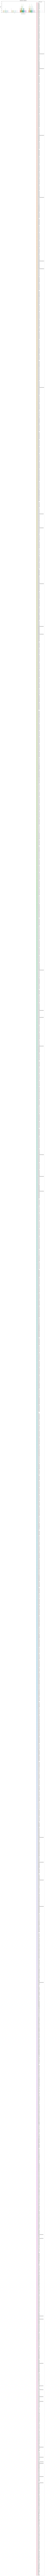

In [ ]:
plt.subplots(figsize= (15, 4))
plt.title('Education vs Attrition')
sns.countplot(x = "Education_Level", hue = "Attrition_rate", data = attrition_data)
plt.show()
plt.close()

In [ ]:
Attrition = list(attrition_data['Attrition_rate'].round(decimals=0))

In [ ]:
attrition_data['Attrition'] = Attrition
attrition_data['Attrition'] = le().fit_transform(attrition_data['Attrition'])
attrition_data.head()

Employee_ID Gender   Age  ...  VAR7 Attrition_rate Attrition
0   EID_23371      F  42.0  ...     3         0.1841         0
1   EID_18000      M  24.0  ...     3         0.0670         0
2    EID_3891      F  58.0  ...     3         0.0851         0
3   EID_17492      F  26.0  ...     3         0.0668         0
4   EID_22534      F  31.0  ...     2         0.1827         0

[5 rows x 25 columns]

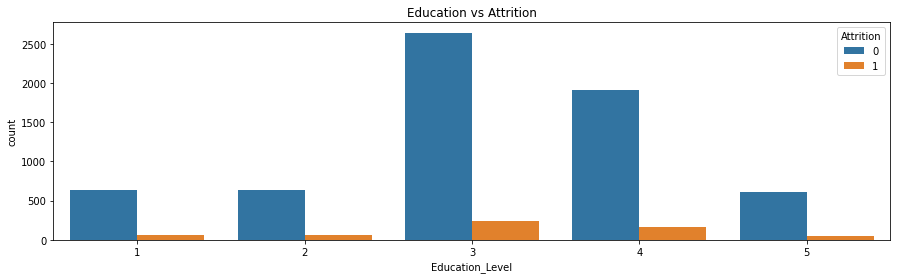

In [ ]:
plt.subplots(figsize= (15, 4))
plt.title('Education vs Attrition')
sns.countplot(x = "Education_Level", hue = "Attrition", data = attrition_data)
plt.show()
plt.close()

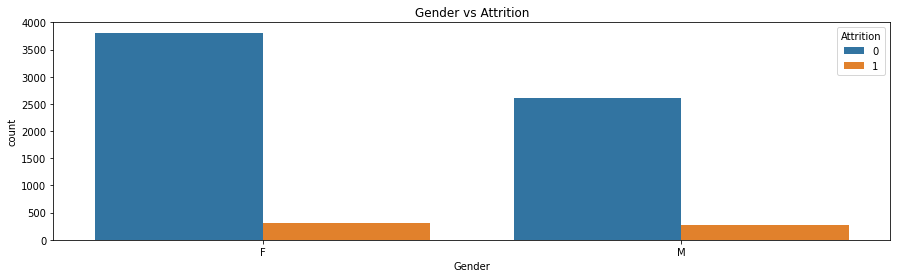

In [ ]:
plt.subplots(figsize= (15, 4))
plt.title('Gender vs Attrition')
sns.countplot(x = "Gender", hue = "Attrition", data = attrition_data)
plt.show()
plt.close()

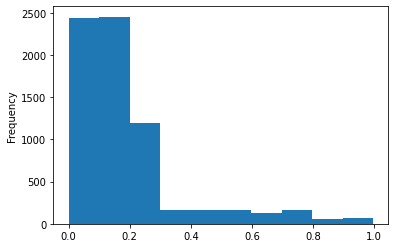

In [ ]:
attrition_data.Attrition_rate.plot.hist();

### Correlation

In [ ]:
attrition_data.corr()

Age  Education_Level  ...  Attrition_rate  Attrition
Age                   1.000000        -0.005599  ...       -0.015086  -0.003848
Education_Level      -0.005599         1.000000  ...       -0.008143  -0.012139
Time_of_service       0.883423        -0.012657  ...       -0.016213  -0.009334
Time_since_promotion  0.141393        -0.002077  ...        0.013880   0.012350
growth_rate           0.001230         0.002991  ...        0.014247   0.005983
Travel_Rate           0.011897        -0.017690  ...       -0.012608  -0.014018
Post_Level            0.002367         0.009986  ...        0.016402   0.005794
Pay_Scale             0.012578         0.006830  ...       -0.015221  -0.015341
Work_Life_balance     0.002985        -0.015241  ...        0.020738   0.016122
VAR1                  0.005534        -0.002185  ...       -0.008073   0.015204
VAR2                  0.005023        -0.009894  ...       -0.022895  -0.024738
VAR3                  0.007356        -0.009689  ...        0.001245  -0.005848
VAR4                  0.001664         0.004283  ...       -0.012576  -0.009804
VAR5                  0.000014         0.005444  ...       -0.004770  -0.003215
VAR6                 -0.000809         0.009195  ...       -0.003130  -0.002745
VAR7                  0.008476         0.012909  ...       -0.015299  -0.019988
Attrition_rate       -0.015086        -0.008143  ...        1.000000   0.831435
Attrition            -0.003848        -0.012139  ...        0.831435   1.000000

[18 rows x 18 columns]

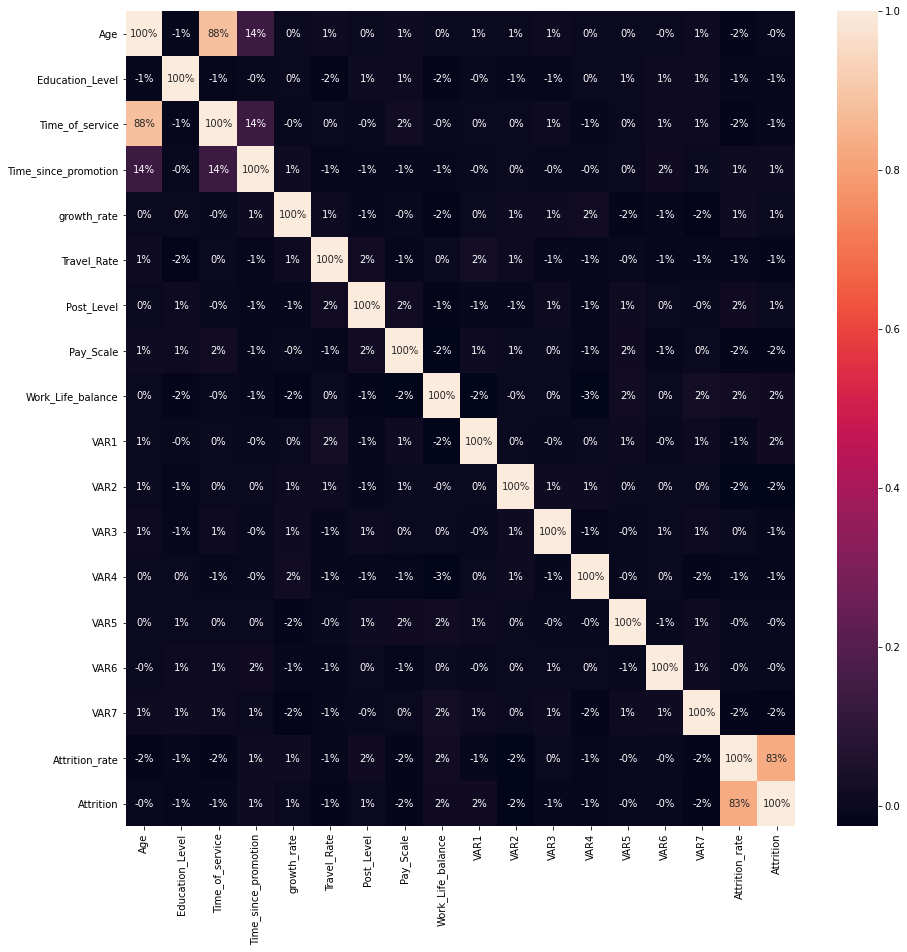

In [ ]:
plt.figure(figsize= (15,15))
sns.heatmap(attrition_data.corr(), annot=True, fmt = '.0%')
plt.show()
plt.close()


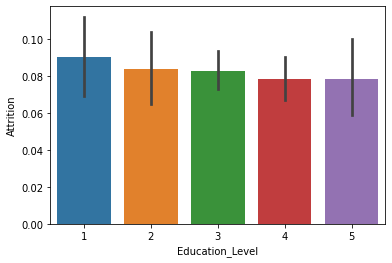

In [ ]:
sns.barplot(x = 'Education_Level',y = 'Attrition', data = attrition_data)
plt.show()

### Label Encoding

In [ ]:
#Label encoding
for col in attrition_data.columns:
  if attrition_data[col].dtype == 'int64'or attrition_data[col].dtype == 'float64':
    continue
  else:
    attrition_data[col] = le().fit_transform(attrition_data[col])

In [ ]:
attrition_data.head()

Employee_ID  Gender   Age  ...  VAR7  Attrition_rate  Attrition
0         4143       0  42.0  ...     3          0.1841          0
1         2500       1  24.0  ...     3          0.0670          0
2         5312       0  58.0  ...     3          0.0851          0
3         2339       0  26.0  ...     3          0.0668          0
4         3885       0  31.0  ...     2          0.1827          0

[5 rows x 25 columns]

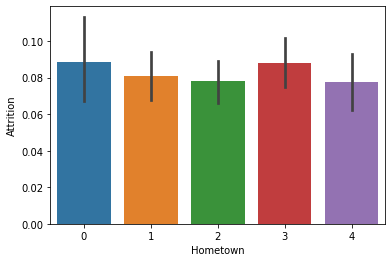

In [ ]:
sns.barplot(x = 'Hometown',y = 'Attrition', data = attrition_data)
plt.show()

### *Correlation after Label Encoding*

In [ ]:
attrition_data.corr()

Employee_ID    Gender  ...  Attrition_rate  Attrition
Employee_ID                   1.000000 -0.023591  ...       -0.003878   0.007945
Gender                       -0.023591  1.000000  ...        0.028544   0.035275
Age                           0.461706  0.001824  ...       -0.015086  -0.003848
Education_Level              -0.001503 -0.007127  ...       -0.008143  -0.012139
Relationship_Status           0.002258  0.008817  ...        0.009107   0.006140
Hometown                     -0.005090 -0.030297  ...        0.006784  -0.001853
Unit                          0.002368 -0.009876  ...        0.024324   0.030071
Decision_skill_possess        0.005208 -0.000748  ...        0.018104   0.020671
Time_of_service               0.419096 -0.000558  ...       -0.016213  -0.009334
Time_since_promotion          0.031601 -0.020346  ...        0.013880   0.012350
growth_rate                  -0.010238 -0.011666  ...        0.014247   0.005983
Travel_Rate                   0.021004  0.006566  ...       -0.012608  -0.014018
Post_Level                    0.002250  0.003734  ...        0.016402   0.005794
Pay_Scale                     0.004344 -0.004955  ...       -0.015221  -0.015341
Compensation_and_Benefits    -0.008290  0.004732  ...       -0.025175  -0.028302
Work_Life_balance             0.007738 -0.003700  ...        0.020738   0.016122
VAR1                          0.025608 -0.005024  ...       -0.008073   0.015204
VAR2                         -0.005744  0.002349  ...       -0.022895  -0.024738
VAR3                          0.006176 -0.000272  ...        0.001245  -0.005848
VAR4                          0.007554 -0.003102  ...       -0.012576  -0.009804
VAR5                         -0.003391  0.015351  ...       -0.004770  -0.003215
VAR6                         -0.005709  0.009894  ...       -0.003130  -0.002745
VAR7                         -0.000996  0.002916  ...       -0.015299  -0.019988
Attrition_rate               -0.003878  0.028544  ...        1.000000   0.831435
Attrition                     0.007945  0.035275  ...        0.831435   1.000000

[25 rows x 25 columns]

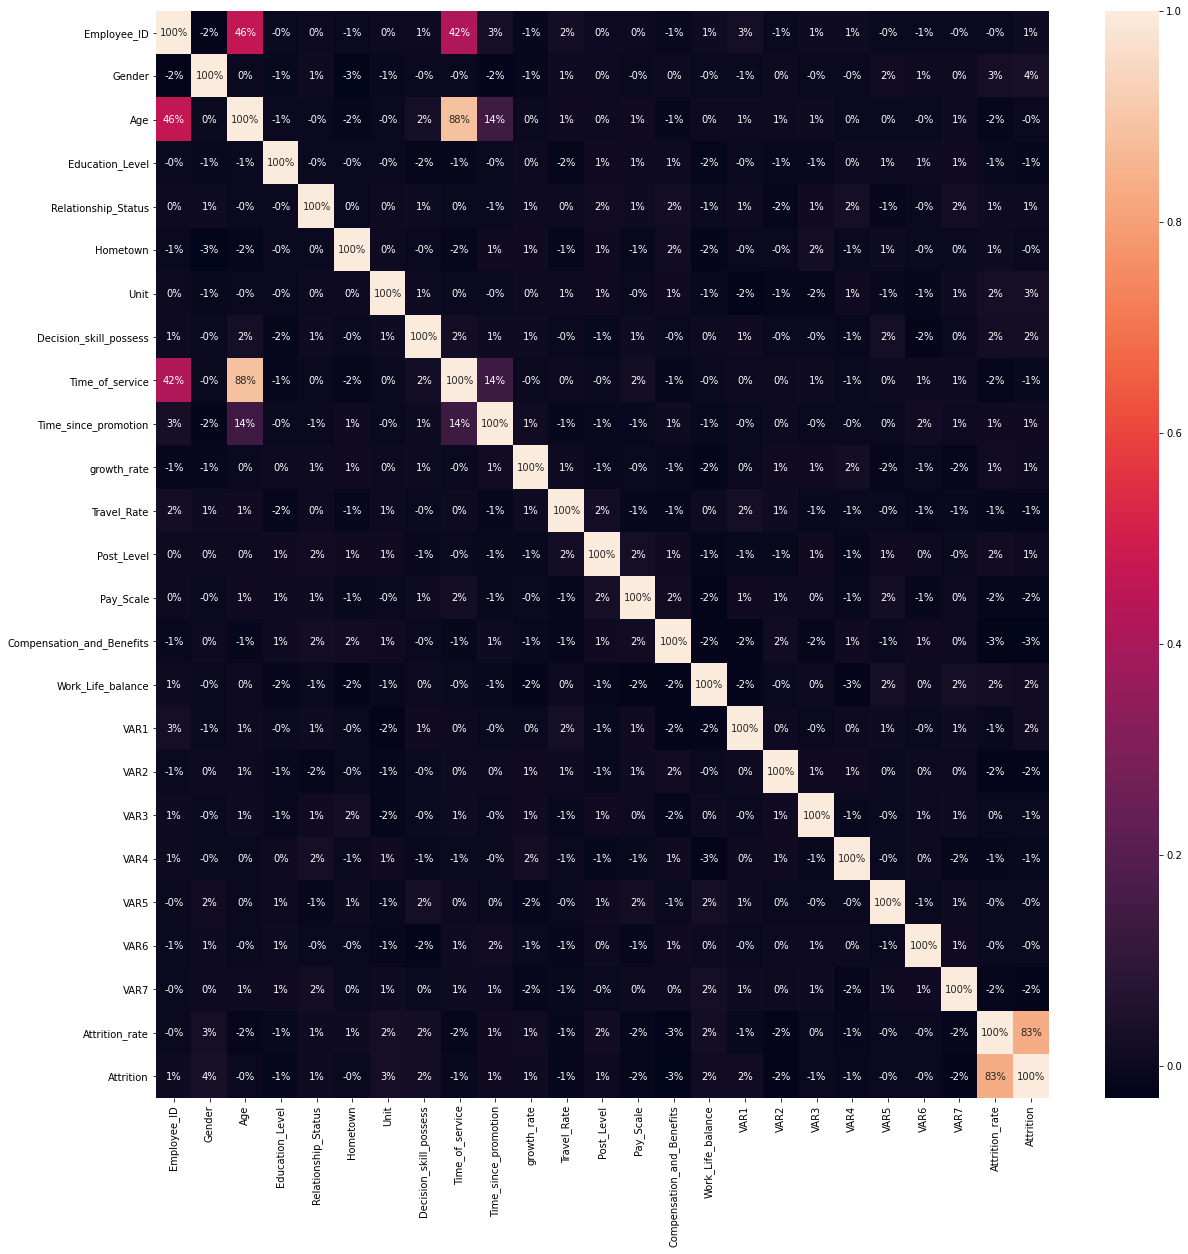

In [ ]:
plt.figure(figsize= (20,20))
sns.heatmap(attrition_data.corr(), annot=True, fmt = '.0%')
plt.show()
plt.close()


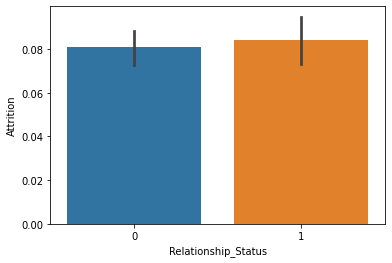

In [ ]:
sns.barplot(x = 'Relationship_Status',y = 'Attrition', data = attrition_data)
plt.show()

In [ ]:
attrition_data = attrition_data.drop(['Employee_ID'], axis = 1)
attrition_data.head()

Gender   Age  Education_Level  ...  VAR7  Attrition_rate  Attrition
0       0  42.0                4  ...     3          0.1841          0
1       1  24.0                3  ...     3          0.0670          0
2       0  58.0                3  ...     3          0.0851          0
3       0  26.0                3  ...     3          0.0668          0
4       0  31.0                1  ...     2          0.1827          0

[5 rows x 24 columns]

In [ ]:
features = attrition_data.drop(['Attrition_rate','Attrition'], axis=1)
labels = attrition_data['Attrition_rate']


In [ ]:
features = StandardScaler().fit_transform(features)
print(features)

[[-0.83756018  0.18009898  0.76255659 ...  1.24175608 -1.80495079
  -0.27776175]
 [ 1.19394406 -1.18359795 -0.17638732 ...  0.17665468 -1.80495079
  -0.27776175]
 [-0.83756018  1.39227403 -0.17638732 ...  0.17665468  0.77197263
  -0.27776175]
 ...
 [-0.83756018  0.71042557 -0.17638732 ...  1.24175608  0.77197263
  -0.27776175]
 [-0.83756018  0.55890369 -0.17638732 ...  0.17665468 -0.94597631
  -0.27776175]
 [-0.83756018  1.39227403 -0.17638732 ...  1.24175608 -1.80495079
  -0.27776175]]


### Principal Component Analysis

In [ ]:
pca = PCA(n_components=20)

pct = pca.fit_transform(features)

print(np.cumsum(pca.explained_variance_ratio_))
principal_df = pd.DataFrame(pct,columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 
                                         'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20'])
display(principal_df)
finaldf = pd.concat([principal_df,labels],axis=1)
# finaldf1 = pd.concat([principal_df, attrition_data['Attrition']],axis=1)
# finaldf2 = pd.concat([principal_df, Attrition1], axis=1)

[0.08763251 0.13732027 0.18587297 0.23418537 0.28186752 0.3292899
 0.37626039 0.42288946 0.46943087 0.51519571 0.56054765 0.60578556
 0.65051724 0.69489521 0.73920286 0.78282682 0.82574022 0.86841705
 0.91083576 0.95300759]


pc1       pc2       pc3  ...      pc18      pc19      pc20
0    -0.139539  1.435874  0.959923  ...  2.642404 -0.540958 -0.000074
1    -1.189602  0.462721 -0.587653  ... -0.039278 -1.145602  0.038921
2     2.061803 -1.038203  0.668144  ...  0.468260  0.561915 -0.738426
3    -1.229927 -0.920240  0.061324  ...  0.607342  0.722816  0.891101
4    -0.779172 -0.848730  1.716235  ... -0.192015  0.784758  0.263587
...        ...       ...       ...  ...       ...       ...       ...
6995 -1.800771  0.315937 -1.208152  ...  0.697929  0.523702  1.008694
6996  0.260931 -0.034882 -0.220341  ... -1.235621  0.228139 -0.757360
6997  0.023376  0.894093  0.528307  ... -1.113963  0.265354  1.033089
6998  0.911290  0.737220  0.377944  ... -0.929540 -0.647127  0.758440
6999  1.494781 -0.119969  1.144931  ... -1.664921  1.238886 -1.550112

[7000 rows x 20 columns]

In [ ]:
print(finaldf)

           pc1       pc2       pc3  ...      pc19      pc20  Attrition_rate
0    -0.139539  1.435874  0.959923  ... -0.540958 -0.000074          0.1841
1    -1.189602  0.462721 -0.587653  ... -1.145602  0.038921          0.0670
2     2.061803 -1.038203  0.668144  ...  0.561915 -0.738426          0.0851
3    -1.229927 -0.920240  0.061324  ...  0.722816  0.891101          0.0668
4    -0.779172 -0.848730  1.716235  ...  0.784758  0.263587          0.1827
...        ...       ...       ...  ...       ...       ...             ...
6995 -1.800771  0.315937 -1.208152  ...  0.523702  1.008694          0.7839
6996  0.260931 -0.034882 -0.220341  ...  0.228139 -0.757360          0.1055
6997  0.023376  0.894093  0.528307  ...  0.265354  1.033089          0.7847
6998  0.911290  0.737220  0.377944  ... -0.647127  0.758440          0.4162
6999  1.494781 -0.119969  1.144931  ...  1.238886 -1.550112          0.0910

[7000 rows x 21 columns]


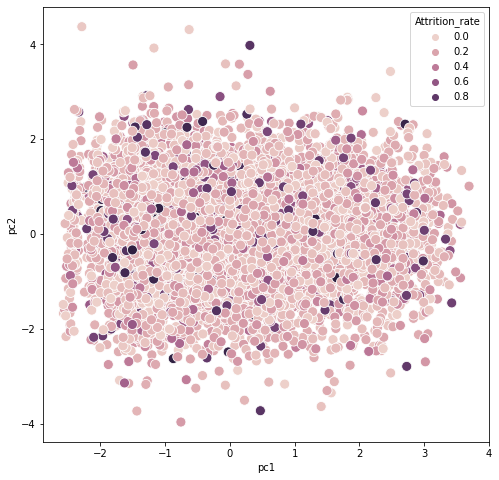

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='pc1', y='pc2', hue='Attrition_rate', data=finaldf, s=100)
plt.show()


In [ ]:
attrition_data['Attrition'].value_counts()

0    6426
1     574
Name: Attrition, dtype: int64

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
features = finaldf.drop(['Attrition_rate'], axis = 1)
target = attrition_data['Attrition_rate']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)
x_train.shape

(4690, 20)

In [ ]:
regressor = RandomForestRegressor(n_estimators = 80, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1367594149480435
Mean Squared Error: 0.038225574143063414
Root Mean Squared Error: 0.19551361626000224


In [ ]:
print(regressor.score(x_train, y_train))
print(regressor.score(x_test, y_test))

0.8498439014224335
-0.03859826620890128


# Predicting on test data

In [ ]:
attrition_test_data = pd.read_csv('/content/Test.csv')

In [ ]:
attrition_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   object 
 2   Age                        2839 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   object 
 5   Hometown                   3000 non-null   object 
 6   Unit                       3000 non-null   object 
 7   Decision_skill_possess     3000 non-null   object 
 8   Time_of_service            2948 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  2997 non-null   float

In [ ]:
null_columns_test = []
for col in attrition_test_data.columns:
  if attrition_test_data[col].isnull().any() == True:
    null_columns_test.append(col)
null_columns_test

['Age', 'Time_of_service', 'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4']

In [ ]:
for col in null_columns_test:
  fillNullValues(attrition_test_data,col)

In [ ]:
attrition_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   object 
 2   Age                        3000 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   object 
 5   Hometown                   3000 non-null   object 
 6   Unit                       3000 non-null   object 
 7   Decision_skill_possess     3000 non-null   object 
 8   Time_of_service            3000 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  3000 non-null   float

In [ ]:
#Label encoding
for col in attrition_test_data.columns:
  if attrition_test_data[col].dtype == 'int64'or attrition_test_data[col].dtype == 'float64':
    continue
  else:
    attrition_test_data[col] = le().fit_transform(attrition_test_data[col])

In [ ]:
attrition_test_data.head()

Employee_ID  Gender   Age  Education_Level  ...  VAR4  VAR5  VAR6  VAR7
0         1702       0  32.0                5  ...   2.0     1     8     4
1         2958       1  65.0                2  ...   1.0     2     8     2
2         1628       1  52.0                3  ...   2.0     1     9     3
3         2709       1  50.0                5  ...   2.0     2     8     3
4         2580       0  44.0                3  ...   2.0     2     7     4

[5 rows x 23 columns]

In [ ]:
Emp_ID = (attrition_test_data['Employee_ID'])
print(Emp_ID)

0       1702
1       2958
2       1628
3       2709
4       2580
        ... 
2995    1677
2996      12
2997    2656
2998    2405
2999    1990
Name: Employee_ID, Length: 3000, dtype: int64


In [ ]:
attrition_test_data = attrition_test_data.drop(['Employee_ID'], axis = 1)

In [ ]:
test_preds=regressor.predict(attrition_test_data)

In [ ]:
df_preds=pd.DataFrame()
df_preds["Attrition_rate"] = test_preds
df_preds

Attrition_rate
0           0.216784
1           0.296818
2           0.265878
3           0.252689
4           0.203778
...              ...
2995        0.164294
2996        0.215328
2997        0.195690
2998        0.196834
2999        0.199292

[3000 rows x 1 columns]